# Customer Segmentation and Profiling:

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

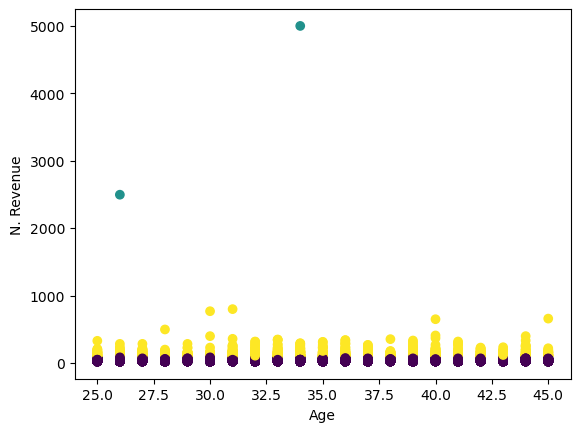

   Items sold  N. Revenue  Age  Cluster
0          10          50   25        0
1          20         100   35        2


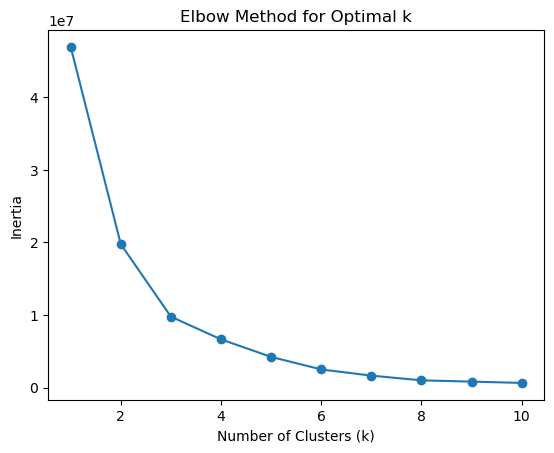

              Order #  Items sold   N. Revenue        Age
Cluster                                                  
0        10657.758727    1.617911    43.568272  34.618795
1        11761.000000   94.000000  3745.600000  30.000000
2        11024.793132    3.965658   141.744154  34.869174


In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Order Report Dataset
order_df = pd.read_csv('datasets/OrderReports.csv')

# Feature selection
features = order_df[['Items sold', 'N. Revenue', 'Age']]

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You may adjust the number of clusters
order_df['Cluster'] = kmeans.fit_predict(features) 
print(order_df.head())


from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, order_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize
plt.scatter(order_df['Age'], order_df['N. Revenue'], c=order_df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('N. Revenue')
plt.show()


# Assuming you want to predict the cluster for new data
new_data = pd.DataFrame({'Items sold': [10, 20], 'N. Revenue': [50, 100], 'Age': [25, 35]})

# Predict clusters for new data
new_data['Cluster'] = kmeans.predict(new_data[['Items sold', 'N. Revenue', 'Age']])
print(new_data)

# Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# print the cluster from the dataframe
cluster_means = order_df.groupby('Cluster').mean()
print(cluster_means)












# Streamlining Inventory Management:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                   Orders   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                        2605023.861
Optimized:                         True   AIC                           1149.040
Trend:                         Additive   BIC                           1192.392
Seasonal:                      Additive   AICC                          1156.475
Seasonal Periods:                    12   Date:                 Fri, 10 Nov 2023
Box-Cox:                          False   Time:                         21:43:12
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8206589                alpha                 True
smoothing_trend          

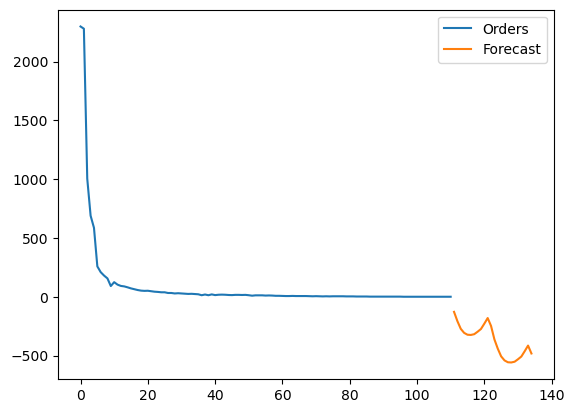

                               SARIMAX Results                                
Dep. Variable:                 Orders   No. Observations:                  111
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -683.748
Date:                Fri, 10 Nov 2023   AIC                           1373.496
Time:                        21:43:12   BIC                           1381.598
Sample:                             0   HQIC                          1376.782
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9640      0.023     41.123      0.000       0.918       1.010
ma.L1         -0.7460      0.093     -8.027      0.000      -0.928      -0.564
sigma2      1.436e+04    821.916     17.476      0.0

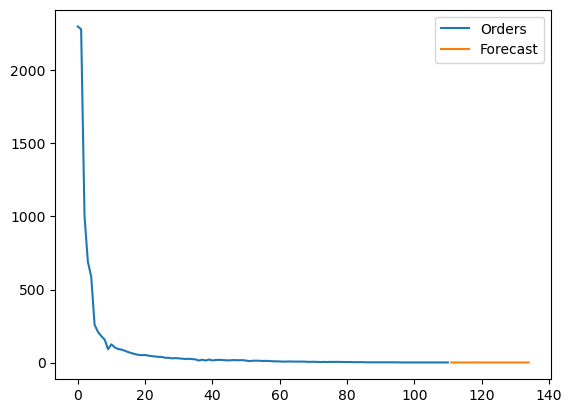

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17547D+01    |proj g|=  1.03882D+01

At iterate    5    f=  8.79191D+00    |proj g|=  2.68043D-01


 This problem is unconstrained.



At iterate   10    f=  5.98538D+00    |proj g|=  9.60435D-02

At iterate   15    f=  5.83648D+00    |proj g|=  2.91190D-03
  ys=-7.309E-03  -gs= 2.579E-02 BFGS update SKIPPED

At iterate   20    f=  5.54998D+00    |proj g|=  1.09447D-03

At iterate   25    f=  5.54971D+00    |proj g|=  2.56948D-04
  ys=-6.683E-04  -gs= 5.390E-04 BFGS update SKIPPED

At iterate   30    f=  5.54477D+00    |proj g|=  1.34459D-02

At iterate   35    f=  5.54129D+00    |proj g|=  4.25825D-03

At iterate   40    f=  5.54086D+00    |proj g|=  1.26256D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     74      1     2     0   2

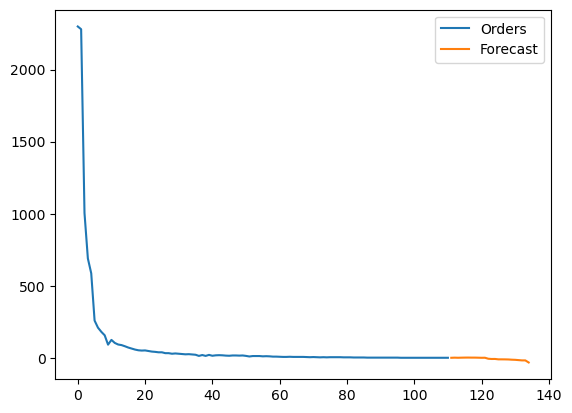

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load Product List Dataset
product_df = pd.read_csv('datasets/ProductList.csv')

# Time series forecasting - Exponential Smoothing
# Analyze 'Stock' and 'Orders' columns to forecast 'Orders' for the next 24 months
# You may adjust the parameters
model = ExponentialSmoothing(product_df['Orders'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(24)
print(forecast)

# Visualize
plt.plot(product_df['Orders'], label='Orders')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

# Load Product List Dataset
product_df = pd.read_csv('datasets/ProductList.csv')

# Time series forecasting - ARIMA
# Analyze 'Stock' and 'Orders' columns to forecast 'Orders' for the next 24 months
# You may adjust the parameters
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(product_df['Orders'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(24)
print(forecast)

# Visualize
plt.plot(product_df['Orders'], label='Orders')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

# Load Product List Dataset
product_df = pd.read_csv('datasets/ProductList.csv')

# Time series forecasting - SARIMA
# Analyze 'Stock' and 'Orders' columns to forecast 'Orders' for the next 24 months
# You may adjust the parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(product_df['Orders'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(24)
print(forecast)

# Visualize
plt.plot(product_df['Orders'], label='Orders')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

# predicting the next 24 months
# Load Product List Dataset


